## Imports Libraries and Tools

In [19]:
import os  # For directory and file operations
import numpy as np  # For numerical operations and handling image arrays
import random  # For generating random values for augmentation
import matplotlib.pyplot as plt  # For plotting images and results
from PIL import Image, ImageEnhance  # For image processing and enhancement
from tensorflow.keras.preprocessing.image import load_img  # For loading images
from tensorflow.keras.models import Sequential  # For building the model
from tensorflow.keras.layers import Input, Flatten, Dropout, Dense  # For model layers
from tensorflow.keras.optimizers import Adam  # For optimizer
from tensorflow.keras.applications import VGG16  # For using VGG16 model
from sklearn.utils import shuffle  # For shuffling the data

## Load Datasets

In [12]:
# Directories for training and testing data
train_dir = '../data/Training'
test_dir = '../data/Testing'

# Load and shuffle the train data
train_paths = []
train_labels = []

for label in os.listdir(train_dir):
    for image in os.listdir(os.path.join(train_dir, label)):
        train_paths.append(os.path.join(train_dir, label, image))
        train_labels.append(label)

# Shuffle the training data
train_paths, train_labels = shuffle(train_paths, train_labels, random_state=42)

# Load and shuffle the test data
test_paths = []
test_labels = []

for label in os.listdir(test_dir):
    for image in os.listdir(os.path.join(test_dir, label)):
        test_paths.append(os.path.join(test_dir, label, image))
        test_labels.append(label)

# Shuffle the test data
test_paths, test_labels = shuffle(test_paths, test_labels, random_state=42)

In [14]:
print(f"Total training images: {len(train_paths)} \n")
print(train_paths[: 5],'\n')  # Display first 5 training image paths
print(f"Total testing images: {len(test_paths)} \n")
print(test_paths[: 5],'\n')  # Display first 5 testing image paths

Total training images: 5712 

['../data/Training\\meningioma\\Tr-me_0379.jpg', '../data/Training\\notumor\\Tr-no_0609.jpg', '../data/Training\\glioma\\Tr-gl_0561.jpg', '../data/Training\\pituitary\\Tr-pi_1210.jpg', '../data/Training\\pituitary\\Tr-pi_1205.jpg'] 

Total testing images: 1311 

['../data/Testing\\pituitary\\Te-pi_0109.jpg', '../data/Testing\\pituitary\\Te-pi_0061.jpg', '../data/Testing\\glioma\\Te-gl_0198.jpg', '../data/Testing\\meningioma\\Te-me_0275.jpg', '../data/Testing\\meningioma\\Te-me_0031.jpg'] 



## Data Visualization

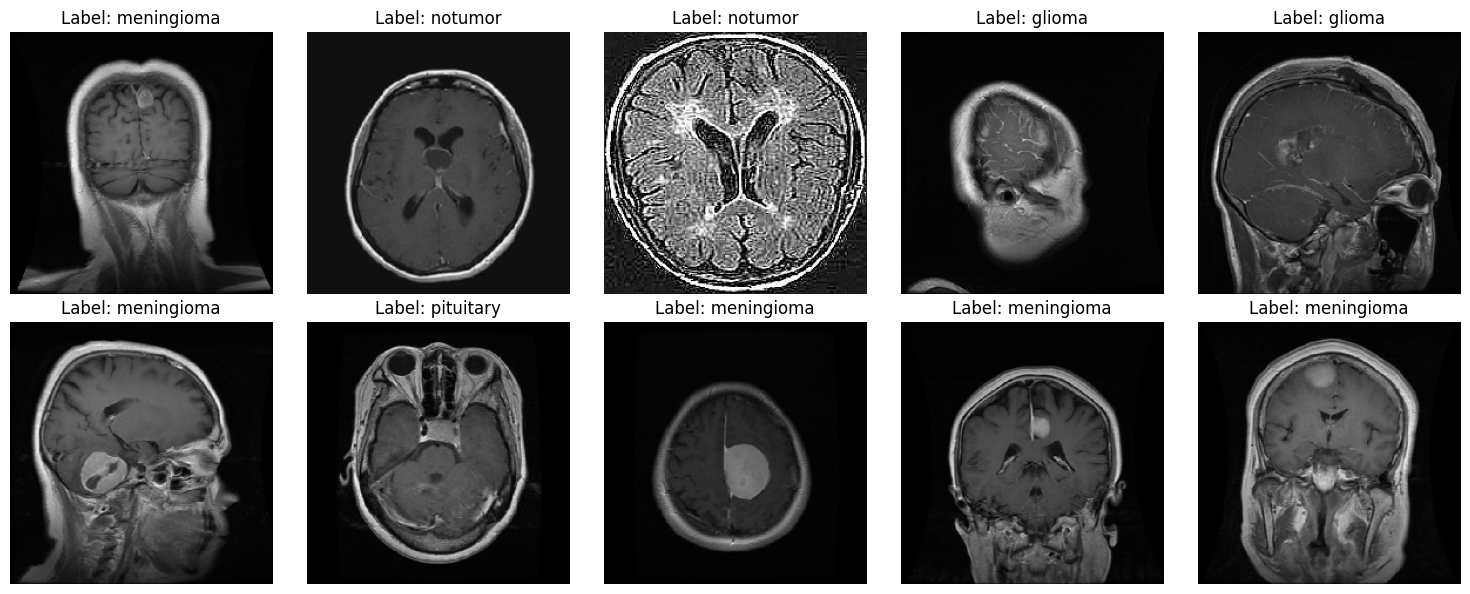

In [20]:
# Select random indices for 10 images
random_indices = random.sample(range(len(train_paths)), 10)

# Create a figure to display images in 2 rows
fig, axis = plt.subplots(2, 5, figsize=(15, 6))
axis = axis.flatten()

# Load and display images with their labels
for i, idx in enumerate(random_indices):
    img = load_img(train_paths[idx], target_size=(224, 224))
    axis[i].imshow(img)
    axis[i].set_title(f"Label: {train_labels[idx]}")
    axis[i].axis('off')

plt.tight_layout()
plt.show()



## Data Preprocessing

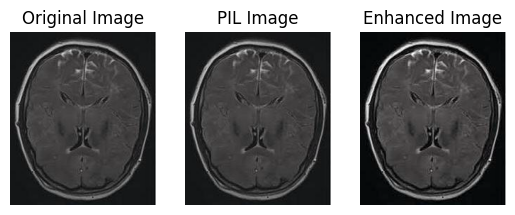

In [ ]:
# Image Contrast Enhancement Example

import cv2 as cv

path = '../data/Training/notumor/Tr-no_0609.jpg' # Example image path
image = cv.imread(path) # Load image using OpenCV
image = np.clip(image, 0, 255) # Ensure pixel values are in valid range
image = image.astype(np.uint8) # Convert to uint8 type
image_obj = Image.fromarray(np.uint8(image)) # Convert to PIL Image
image_enh = ImageEnhance.Contrast(image_obj).enhance(random.uniform(.8, 3.5)) # Enhance contrast

# Display the original and enhanced images
plt.subplot(1,3,1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(image_obj)
plt.title('PIL Image')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(image_enh)
plt.title('Enhanced Image')
plt.axis('off')

plt.show()

In [49]:
# Image Augmentation function
def augment_image(image):
    image = np.clip(image, 0, 255).astype(np.uint8)
    image = Image.fromarray(image)
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8, 1.3))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8, 1.3))
    image = np.array(image)/255.0

    return image

# Load images and apply augmentation
def open_images(image_paths):
    images=[]
    for path in image_paths:
        image = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        image = augment_image(image)
        images.append(images)

    return np.array(images)    

# Encoding labels (convert label names to integers)
def encode_label(labels):
    unique_labels = os.listdir(train_dir)  
    encoded = [unique_labels.index(label) for label in labels]
    return np.array(encoded)

# Data generator for batching
def data_generator(image_paths, labels, batch_size=12, epochs=1):
    for _ in range(epochs):
        for i in range(0, len(image_paths), batch_size):
            batch_paths = image_paths[i:i + batch_size]
            batch_images = open_images(batch_paths)
            batch_labels = encode_label(labels[i:i + batch_size])
            yield batch_images, batch_labels


